<a href="https://colab.research.google.com/github/rorycohdes/CSCI311_SR/blob/master/algorithm_analysis_senior_research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("imkrkannan/student-performance-data-set-y-uci")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'student-performance-data-set-y-uci' dataset.
Path to dataset files: /kaggle/input/student-performance-data-set-y-uci


In [ ]:
import os

# The 'path' variable holds the directory where the dataset files are located
# We need to list its contents to find the actual CSV file
file_path = os.path.join(path, os.listdir(path)[0])
print(f"Path to the dataset file: {file_path}")

Path to the dataset file: /kaggle/input/student-performance-data-set-y-uci/student-mat.csv


In [ ]:
df = pd.read_csv(file_path, sep=';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
# Separate features (X) and target (y)
X = df.drop("G3", axis=1)
y = df["G3"].values

# Identify categorical columns
categorical_cols = X.select_dtypes(include='object').columns

# Apply one-hot encoding to categorical columns because StandardScaler can't process non-numeric data
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True) # drop_first to avoid multicollinearity

# Convert the DataFrame to numpy array for consistency with previous step
X = X.values

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

input_dim = X_train.shape[1]


In [ ]:
def build_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_dim,)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='linear')
    ])
    return model


In [ ]:
model_adam = build_model()
model_adam.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="mse",
    metrics=["mae"]
)

history_adam = model_adam.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    verbose=1
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 243ms/step - loss: 121.6642 - mae: 10.1325 - val_loss: 91.0591 - val_mae: 8.6553
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 82.6134 - mae: 8.4296 - val_loss: 60.6822 - val_mae: 7.0218
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 54.6722 - mae: 6.7835 - val_loss: 35.4289 - val_mae: 5.1822
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 37.0546 - mae: 5.3749 - val_loss: 19.1631 - val_mae: 3.6503
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 19.7815 - mae: 3.6059 - val_loss: 12.8615 - val_mae: 2.8013
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 14.4989 - mae: 2.9605 - val_loss: 11.3331 - val_mae: 2.4005
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 14.0251 - mae: 2.8283 - val_loss: 10.4526 - val_mae: 2.2494
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 12.8366 - mae: 2.8442 - val_loss: 9.4774 - val_mae: 2.1762
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.4534 - mae:

In [ ]:
model_sgd = build_model()
model_sgd.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    loss="mse",
    metrics=["mae"]
)

history_sgd = model_sgd.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    verbose=1
)


Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 265ms/step - loss: 76.8049 - mae: 7.4658 - val_loss: 50.1504 - val_mae: 6.5771
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 49.8604 - mae: 6.2207 - val_loss: 14.5580 - val_mae: 2.8679
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 23.0486 - mae: 3.7955 - val_loss: 12.9310 - val_mae: 2.4376
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 35.9392 - mae: 3.7159 - val_loss: 21.9136 - val_mae: 3.5107
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 23.0100 - mae: 3.5770 - val_loss: 17.4762 - val_mae: 3.0894
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 17.2633 - mae: 2.9317 - val_loss: 20.6500 - val_mae: 3.3563
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 28.6390 - mae: 3.5428 - val_loss: 17.5470 - val_mae: 3.1069
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 25.5023 - mae: 3.4977 - val_loss: 27.6890 - val_mae: 4.0929
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 23.4013 - ma

In [ ]:
model_rms = build_model()
model_rms.compile(
    optimizer=RMSprop(learning_rate=0.001),
    loss="mse",
    metrics=["mae"]
)

history_rms = model_rms.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    verbose=1
)


Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 409ms/step - loss: 117.2575 - mae: 9.9860 - val_loss: 78.3187 - val_mae: 7.9646
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 75.5556 - mae: 7.9860 - val_loss: 47.3031 - val_mae: 6.0320
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 45.2211 - mae: 6.0337 - val_loss: 27.4109 - val_mae: 4.4593
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 27.4875 - mae: 4.5360 - val_loss: 16.7683 - val_mae: 3.3627
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 20.0216 - mae: 3.6345 - val_loss: 12.4223 - val_mae: 2.7220
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 12.9163 - mae: 2.8452 - val_loss: 10.2657 - val_mae: 2.3616
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 11.8696 - mae: 2.7730 - val_loss: 9.2995 - val_mae: 2.1442
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 11.1987 - mae: 2.7198 - val_loss: 8.7181 - val_mae: 2.0210
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.4958 - mae: 

In [ ]:
pred_adam = model_adam.predict(X_test).flatten()
pred_sgd = model_sgd.predict(X_test).flatten()
pred_rms = model_rms.predict(X_test).flatten()

mse_adam = mean_squared_error(y_test, pred_adam)
mse_sgd = mean_squared_error(y_test, pred_sgd)
mse_rms = mean_squared_error(y_test, pred_rms)

r2_adam = r2_score(y_test, pred_adam)
r2_sgd = r2_score(y_test, pred_sgd)
r2_rms = r2_score(y_test, pred_rms)

results = {
    "adam": {"mse": mse_adam, "r2": r2_adam},
    "sgd": {"mse": mse_sgd, "r2": r2_sgd},
    "rmsprop": {"mse": mse_rms, "r2": r2_rms}
}

results


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 216ms/step


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


{'adam': {'mse': 5.78257942199707, 'r2': 0.7112880945205688},
 'sgd': {'mse': 44.605857849121094, 'r2': -1.2270760536193848},
 'rmsprop': {'mse': 5.5024824142456055, 'r2': 0.7252727150917053}}

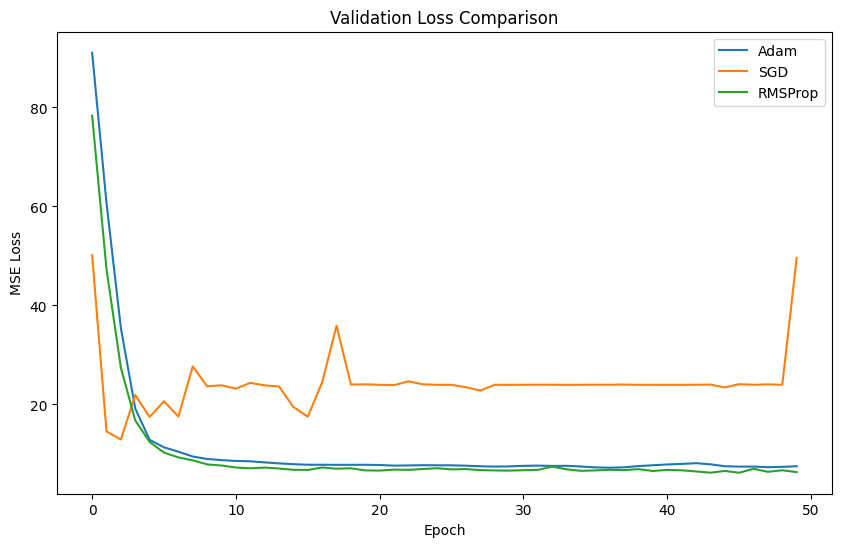

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(history_adam.history["val_loss"], label="Adam")
plt.plot(history_sgd.history["val_loss"], label="SGD")
plt.plot(history_rms.history["val_loss"], label="RMSProp")

plt.title("Validation Loss Comparison")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()


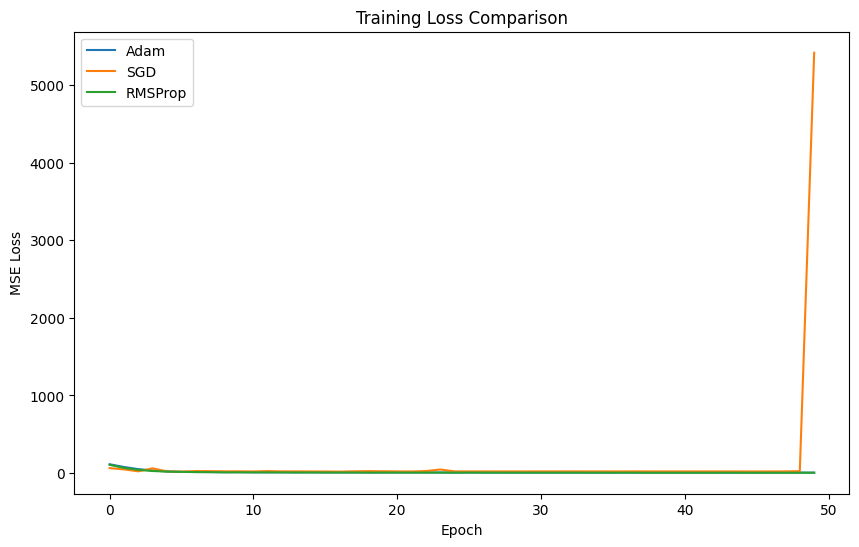

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(history_adam.history["loss"], label="Adam")
plt.plot(history_sgd.history["loss"], label="SGD")
plt.plot(history_rms.history["loss"], label="RMSProp")

plt.title("Training Loss Comparison")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()


In [ ]:
import pandas as pd

pd.DataFrame(results).T


,mse,r2
adam,5.782579,0.711288
sgd,44.605858,-1.227076
rmsprop,5.502482,0.725273
